In [52]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [5]:
base = pd.read_csv('iris.csv')
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
base.shape

(150, 5)

In [10]:
np.random.seed(2345)
amostra = np.random.choice(a = [0,1], size = 150, replace = True, p = [0.7, 0.3])
len(amostra)
len(amostra[amostra == 1])
len(amostra[amostra == 0])
amostra

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [9]:
base_final = base.loc[amostra == 0]
base_final.shape

(101, 5)

In [11]:
base_final2 = base.loc[amostra == 1]
base_final2.shape

(49, 5)

In [16]:
populacao = 150
amostra = 15
k = ceil(populacao / amostra)
print(k)

10


In [22]:
r = np.random.randint(low = 1, high = k + 1, size = 1)
print(r)

[2]


In [23]:
acumulador = r[0]
sorteados = []
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k
print(sorteados)

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142]


In [19]:
len(sorteados)

15

In [24]:
base = pd.read_csv('iris.csv')
base_final = base.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [26]:
iris = pd.read_csv('iris.csv')
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [27]:
x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4], test_size = 0.5, stratify = iris.iloc[:, 4])
y.value_counts()

Iris-setosa        25
Iris-versicolor    25
Iris-virginica     25
Name: class, dtype: int64

In [28]:
infert = pd.read_csv('infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [29]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [34]:
x1, _, y1,_ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                               test_size = 0.6, stratify = infert.iloc[:, 1])
y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

In [36]:
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]
np.mean(jogadores)

181111.11111111112

In [37]:
np.median(jogadores)

40000.0

In [38]:
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75,1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [39]:
np.std(jogadores, ddof = 1)

255307.87514511007

In [40]:
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

In [42]:
norm.cdf(6, 8, 2)

0.15865525393145707

In [48]:
norm.sf(6, 8, 2)

0.8413447460685429

In [49]:
norm.cdf(6, 8, 2) + norm.sf(10, 8, 2)

0.31731050786291415

In [50]:
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

0.3413447460685429

In [63]:
dados = norm.rvs(size = 1000)
dados

array([-0.58197127,  0.3850289 ,  0.12741851,  0.88860909,  0.01589122,
        0.83367744, -0.09037585, -0.86118898,  0.16340879,  0.58308088,
        1.09274506,  1.39408504, -0.03706498, -0.98939802,  1.48438564,
       -1.26705234, -1.67409743,  0.48855514, -1.1291756 ,  0.40264297,
       -0.63995779, -0.04486295, -0.68653947,  0.66642266, -1.17718653,
        0.60584655, -0.10445737, -0.45415499, -0.63113373,  0.06267554,
        1.6322136 , -0.3800147 , -0.02044996,  1.66882558,  0.78670169,
       -1.48612437, -1.17066937,  0.59315514,  0.14467663,  1.26523136,
        0.95894307,  0.30768939,  1.21004177, -1.34019519,  1.82076305,
        0.13671535, -0.72125743, -0.55752932, -0.04111481, -0.18399568,
        2.67749085,  0.26298515, -0.11707354,  0.66066004,  1.13695262,
        0.35875195, -1.13056384, -0.79412426, -0.31475804, -0.92563015,
       -0.12486037, -0.63020204, -0.38606503, -0.32278854, -0.38232048,
       -0.1728497 , -0.28800455, -0.06663651,  1.6429001 , -3.13

Text(0.5, 1.0, 'Dados')

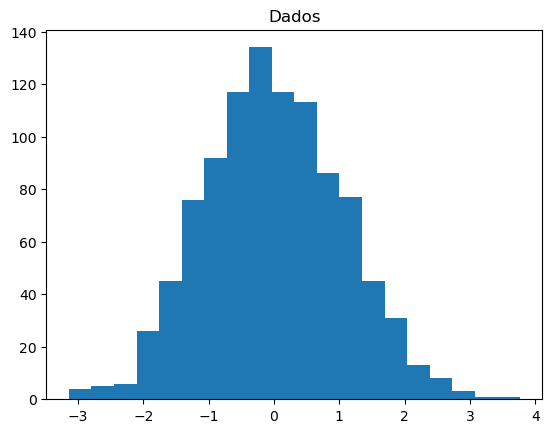

In [64]:
plt.hist(dados, bins = 20)
plt.title('Dados')

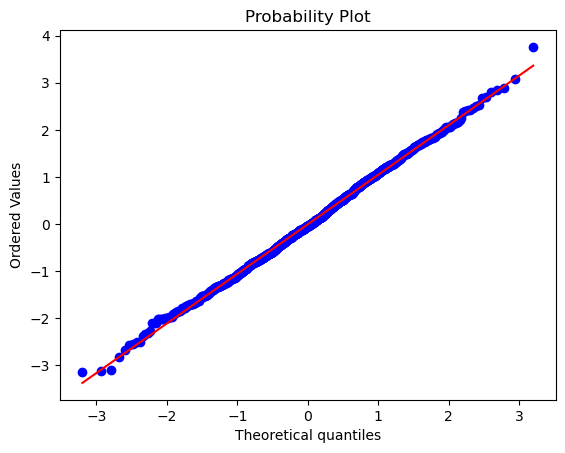

In [65]:
fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax)
plt.show()

In [66]:
stats.shapiro(dados)

ShapiroResult(statistic=0.9984517693519592, pvalue=0.5235135555267334)

In [ ]:
Dados não normais

In [59]:
dados2 = skewnorm.rvs(4, size=1000)

Text(0.5, 1.0, 'Dados')

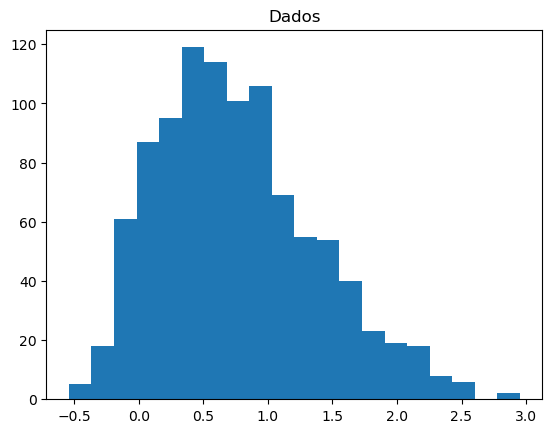

In [60]:
plt.hist(dados2, bins =20)
plt.title('Dados')

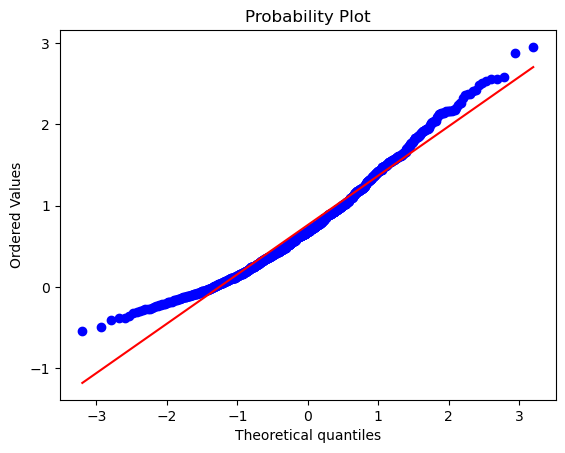

In [61]:
fig, ax = plt.subplots()
stats.probplot(dados2, fit=True, plot=ax)
plt.show()

In [62]:
stats.shapiro(dados2)

ShapiroResult(statistic=0.972676157951355, pvalue=8.951489180973604e-13)